In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import operator
import os
import unicodedata

from os import path

pylab.rcParams['figure.figsize'] = 18, 12  # that's default image size for this interactive session

In [2]:
experiments = [
    "bopos_logreg",
    "bopos_mlp_1_0",
    "bopos_mlp_1_5",
    "bopos_mlp_2_0",
    "bopos_mlp_2_5",
    "bow_logreg",
    "bow_mlp_1_0",
    "bow_mlp_1_5",
    "bow_mlp_2_0",
    "bow_mlp_2_5",
    "mfl",
    "pos_logreg",
    "pos_mlp_1_0",
    "pos_mlp_1_5",
    "pos_mlp_2_0",
    "pos_mlp_2_5",
    "wordvec_logreg",
    "wordvec_mlp_1_0",
    "wordvec_mlp_1_5",
    "wordvec_mlp_2_0",
    "wordvec_mlp_2_5",
    "wordvecpos_logreg",
    "wordvecpos_mlp_1_0",
    "wordvecpos_mlp_1_5",
    "wordvecpos_mlp_2_0",
    "wordvecpos_mlp_2_5"
]

directory = "../resources/results/results_supervised/"
verbs_file = "../resources/sensem/verbs"

In [3]:
with open(verbs_file, "r") as f:
    verbs = unicodedata.normalize("NFC", f.read().decode("utf-8")).strip().split()

accuracies = {e: list() for e in experiments}
most_common_precision = {e: list() for e in experiments}
less_common_recall = {e: list() for e in experiments}

for vidx, verb in enumerate(verbs):
    vidx = "{:03}".format(vidx)

    if not path.isdir(path.join(directory, vidx)):
        continue

    for experiment in experiments:
        accuracy_file = path.join(directory, vidx, experiment, "accuracy")
        mcp_file = path.join(directory, vidx, experiment, "most_common_precision")
        lcr_file = path.join(directory, vidx, experiment, "less_common_recall")

        with open(accuracy_file, "r") as f:
            accuracies[experiment].append(
                np.mean([float(acc.strip()) for acc in f.readlines()])
            )
            
        with open(mcp_file, "r") as f:
            most_common_precision[experiment].append(
                np.mean([float(mcp.strip()) for mcp in f.readlines()])
            )
            
        with open(lcr_file, "r") as f:
            less_common_recall[experiment].append(
                np.mean([float(lcr.strip()) for lcr in f.readlines()])
            )

In [4]:
best_experiments_accuracy =\
    sorted([(e, np.mean(acc)) for e, acc in accuracies.items()], key=operator.itemgetter(1), reverse=True)
best_experiments_mcp =\
    sorted([(e, np.mean(mcp)) for e, mcp in most_common_precision.iteritems()], key=operator.itemgetter(1), reverse=True)
best_experiments_lcr =\
    sorted([(e, np.mean(lcr)) for e, lcr in less_common_recall.iteritems()], key=operator.itemgetter(1), reverse=True)

def get_boxplot_accuracies():
    boxplot_accuracies = []

    for experiment, accuracy in best_experiments_accuracy:
        boxplot_accuracies.append(accuracies[experiment])

    return boxplot_accuracies

def get_boxplot_mcp():
    boxplot_mcp = []

    for experiment, mcp in best_experiments_mcp:
        boxplot_mcp.append(most_common_precision[experiment])

    return boxplot_mcp

def get_boxplot_lcr():
    boxplot_lcr = []

    for experiment, lcr in best_experiments_lcr:
        boxplot_lcr.append(less_common_recall[experiment])

    return boxplot_lcr

wordvecpos_mlp_2_0: 0.761
wordvecpos_mlp_2_5: 0.760
wordvec_logreg: 0.759
wordvec_mlp_2_5: 0.757
wordvecpos_logreg: 0.756
wordvec_mlp_2_0: 0.756
wordvecpos_mlp_1_0: 0.753
wordvecpos_mlp_1_5: 0.752
bow_logreg: 0.747
wordvec_mlp_1_0: 0.745


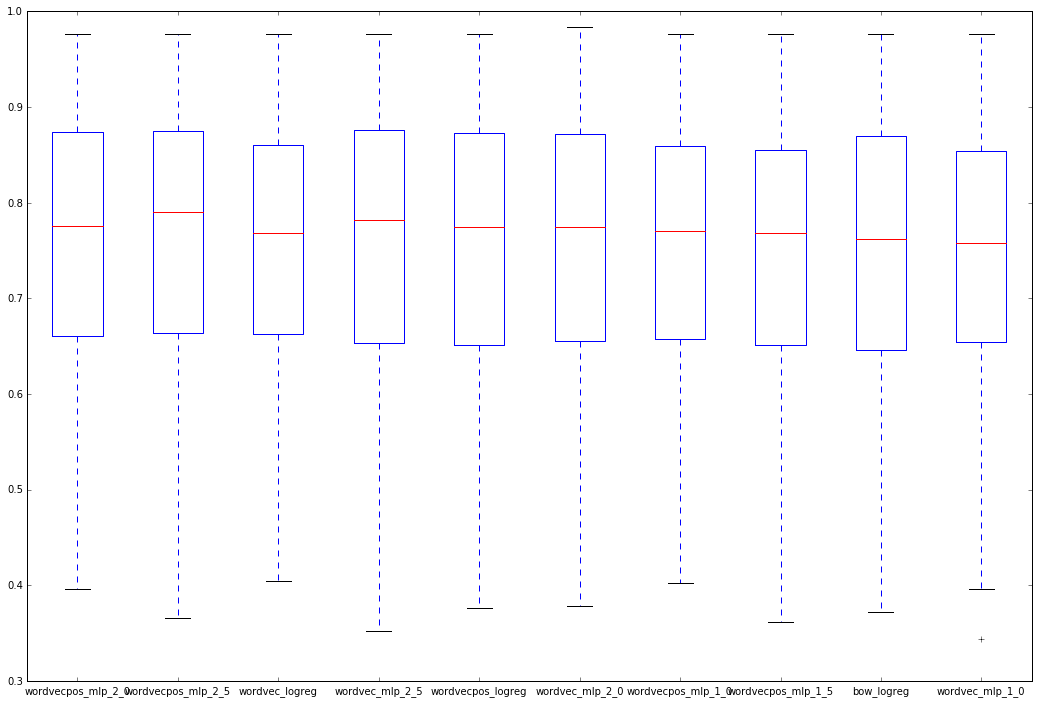

In [5]:
plt.boxplot(get_boxplot_accuracies()[:10], labels=zip(*best_experiments_accuracy)[0][:10])

for experiment, value in best_experiments_accuracy[:10]:
    print "{}: {:.03f}".format(experiment, value)

wordvecpos_mlp_2_0: 0.782
wordvecpos_mlp_2_5: 0.781
wordvec_mlp_2_0: 0.775
wordvec_mlp_2_5: 0.774
wordvecpos_logreg: 0.772
bow_logreg: 0.770
bopos_logreg: 0.764
wordvec_logreg: 0.761
wordvecpos_mlp_1_0: 0.759
wordvecpos_mlp_1_5: 0.757


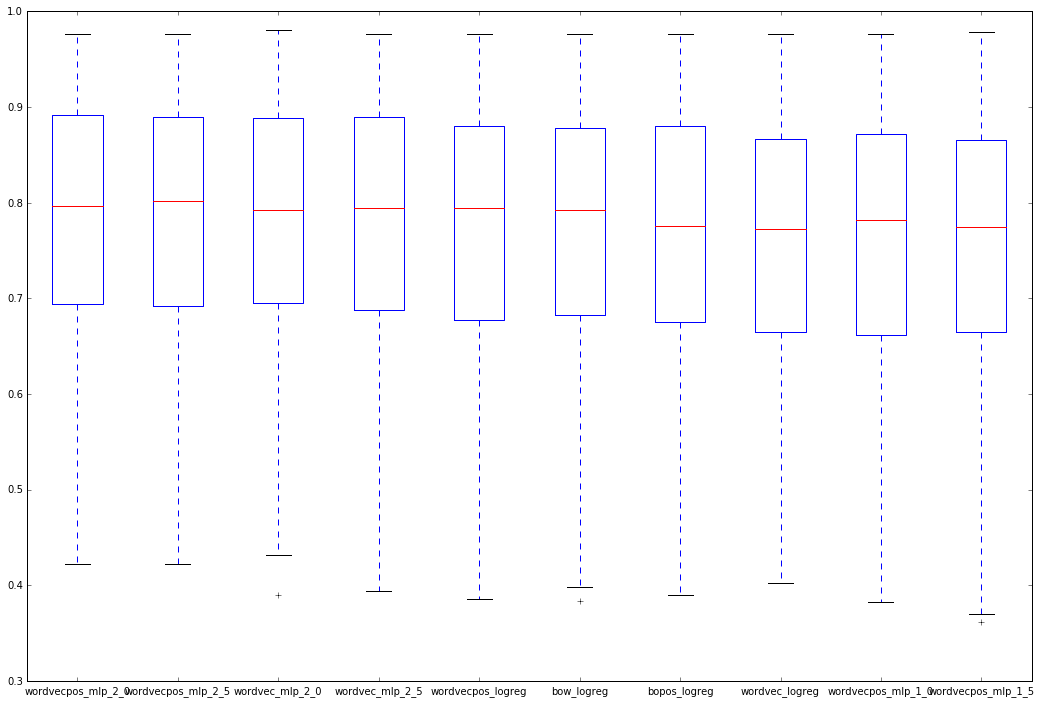

In [6]:
plt.boxplot(get_boxplot_mcp()[:10], labels=zip(*best_experiments_mcp)[0][:10])

for experiment, value in best_experiments_mcp[:10]:
    print "{}: {:.03f}".format(experiment, value)

bow_logreg: 0.269
wordvecpos_mlp_2_0: 0.268
bopos_logreg: 0.261
wordvecpos_mlp_2_5: 0.260
wordvec_mlp_2_5: 0.256
wordvecpos_logreg: 0.256
wordvec_mlp_2_0: 0.255
wordvecpos_mlp_1_0: 0.220
wordvecpos_mlp_1_5: 0.212
wordvec_logreg: 0.211


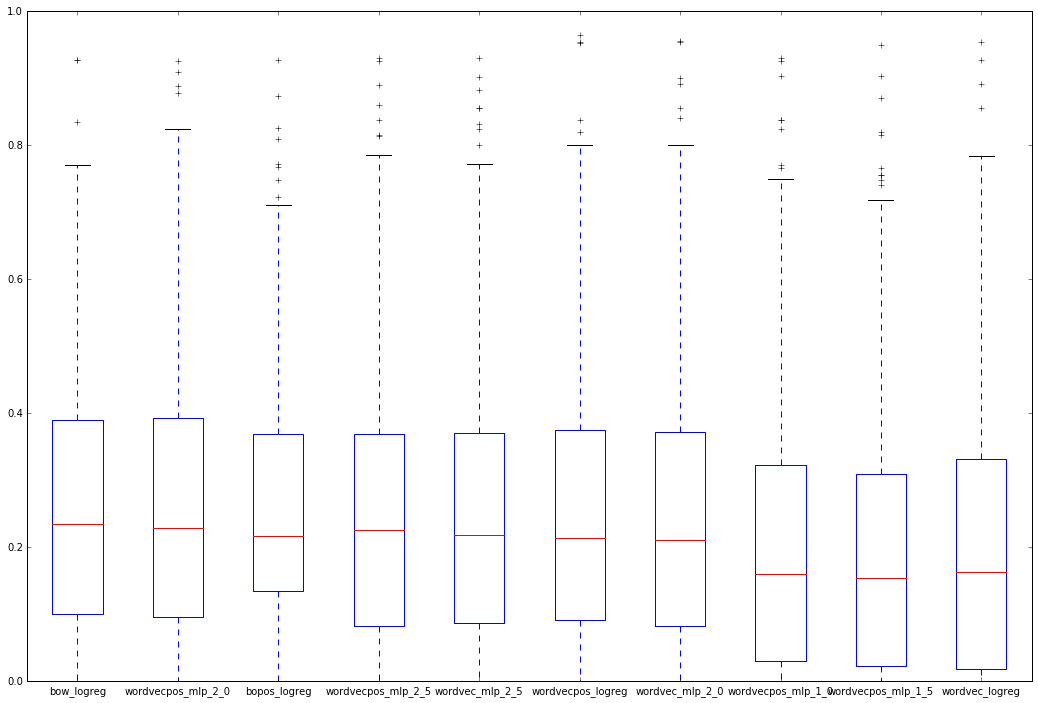

In [7]:
plt.boxplot(get_boxplot_lcr()[:10], labels=zip(*best_experiments_lcr)[0][:10])

for experiment, value in best_experiments_lcr[:10]:
    print "{}: {:.03f}".format(experiment, value)